#  特征工程

## 互信息

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')
df = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/autos.csv')
df.head()
print(df.columns)

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


In [2]:
X = df.copy()
y = X.pop('price')

# Label encoding for categorical
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_socres(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_socres(X, y, discrete_features)
print(mi_scores)

curb_weight          0.915265
highway_mpg          0.899194
horsepower           0.895023
engine_size          0.888876
city_mpg             0.794439
width                0.691859
length               0.616743
wheel_base           0.577476
bore                 0.486800
fuel_system          0.464568
stroke               0.387192
height               0.365941
drive_wheels         0.333404
num_of_cylinders     0.327526
make                 0.240072
symboling            0.233463
peak_rpm             0.232297
engine_type          0.154206
compression_ratio    0.114018
aspiration           0.087994
body_style           0.049523
fuel_type            0.047298
num_of_doors         0.010938
engine_location      0.000000
Name: MI Scores, dtype: float64


In [3]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [4]:
sns.relplot(x='curb_weight', y='price', data=df)

In [5]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=df)

## Creating Features

In [6]:
# Creating Feature -- Mathematical Transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes',
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=14,
      titlepad=10)
accidents = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/accidents.csv')
autos = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/autos.csv')
concrete = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/concrete.csv')
customer = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/customer.csv')

In [7]:
autos['stroke_ratio'] = autos.stroke / autos.bore
print(autos[['stroke', 'bore', 'stroke_ratio']].head())
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)
print(autos[['stroke', 'bore', 'stroke_ratio', 'displacement']].head())

   stroke  bore  stroke_ratio
0    2.68  3.47      0.772334
1    2.68  3.47      0.772334
2    3.47  2.68      1.294776
3    3.40  3.19      1.065831
4    3.40  3.19      1.065831
   stroke  bore  stroke_ratio  displacement
0    2.68  3.47      0.772334    101.377976
1    2.68  3.47      0.772334    101.377976
2    3.47  2.68      1.294776    117.446531
3    3.40  3.19      1.065831    108.695147
4    3.40  3.19      1.065831    135.868934


In [8]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [9]:
# Creating Feature -- Count
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents['RoadwayFeatures'] = accidents[roadway_features].sum(axis=1)
accidents[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [10]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [11]:
# Creating Feature -- 特征字段分解

customer[['Type', 'Level']] = (customer['Policy'].str.split(" ",expand=True))
customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [12]:
autos['make_and_style'] = autos['make'] + "_" + autos['body_style']
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [13]:
# Creating Feature -- 分组增加特征
customer['AverageIncome'] = customer.groupby('State')['Income'].transform('mean')
customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [14]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Extended,488.847853
1,Basic,380.824181
2,Basic,380.824181
3,Premium,655.171951
4,Basic,380.824181
5,Extended,488.847853
6,Basic,380.824181
7,Premium,655.171951
8,Basic,380.824181
9,Extended,488.847853


In [15]:
from sklearn.cluster import KMeans
house = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/housing.csv')
house_X = house.loc[:, ['MedInc', 'Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=6)
house_X['Cluster'] = kmeans.fit_predict(house_X)
house_X['Cluster'] = house_X['Cluster'].astype('category')
sns.relplot(x='Longitude', y='Latitude', hue='Cluster', data=house_X, height=6)

In [16]:
from sklearn.cluster import KMeans
KMeans?

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')
df = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/autos.csv')
df.head()
print(df.columns)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [8]:
X = df.copy()
y = X.pop('price')

# Label encoding for categorical
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_socres(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_socres(X, y, discrete_features)
print(mi_scores)

engine_size          0.915837
curb_weight          0.911396
highway_mpg          0.889423
horsepower           0.880296
city_mpg             0.788959
width                0.684783
length               0.604104
wheel_base           0.596683
bore                 0.491054
fuel_system          0.462300
stroke               0.386644
height               0.354426
drive_wheels         0.333404
num_of_cylinders     0.330548
make                 0.262354
peak_rpm             0.225287
symboling            0.224129
engine_type          0.147734
compression_ratio    0.113725
aspiration           0.087755
body_style           0.054583
fuel_type            0.047298
num_of_doors         0.010938
engine_location      0.000000
Name: MI Scores, dtype: float64


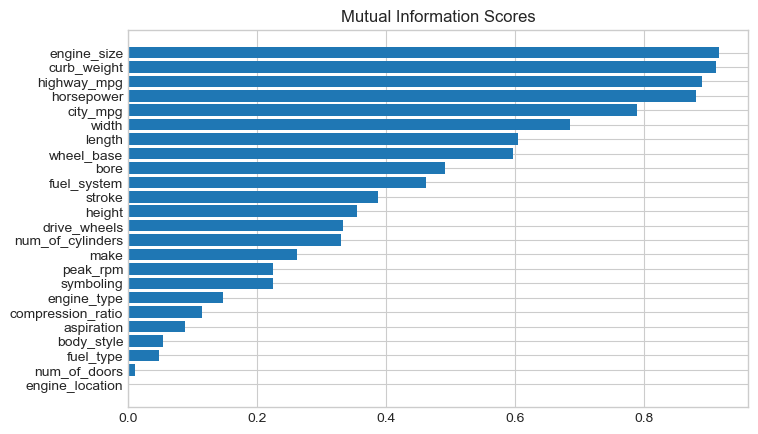

In [10]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

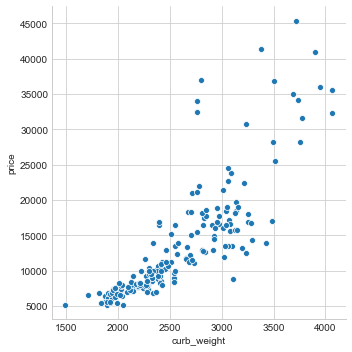

In [11]:
sns.relplot(x='curb_weight', y='price', data=df)

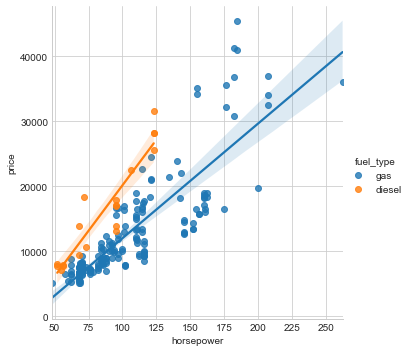

In [13]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=df)

## Creating Features

In [17]:
# Creating Feature -- Mathematical Transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes',
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=14,
      titlepad=10)
accidents = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/accidents.csv')
autos = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/autos.csv')
concrete = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/concrete.csv')
customer = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/customer.csv')

In [19]:
autos['stroke_ratio'] = autos.stroke / autos.bore
print(autos[['stroke', 'bore', 'stroke_ratio']].head())
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)
print(autos[['stroke', 'bore', 'stroke_ratio', 'displacement']].head())

   stroke  bore  stroke_ratio
0    2.68  3.47      0.772334
1    2.68  3.47      0.772334
2    3.47  2.68      1.294776
3    3.40  3.19      1.065831
4    3.40  3.19      1.065831
   stroke  bore  stroke_ratio  displacement
0    2.68  3.47      0.772334    101.377976
1    2.68  3.47      0.772334    101.377976
2    3.47  2.68      1.294776    117.446531
3    3.40  3.19      1.065831    108.695147
4    3.40  3.19      1.065831    135.868934


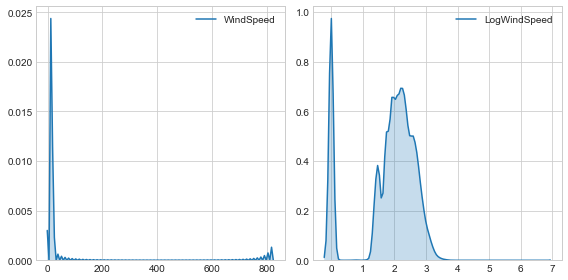

In [24]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [25]:
# Creating Feature -- Count
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents['RoadwayFeatures'] = accidents[roadway_features].sum(axis=1)
accidents[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [26]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [28]:
# Creating Feature -- 特征字段分解

customer[['Type', 'Level']] = (customer['Policy'].str.split(" ",expand=True))
customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [29]:
autos['make_and_style'] = autos['make'] + "_" + autos['body_style']
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [31]:
# Creating Feature -- 分组增加特征
customer['AverageIncome'] = customer.groupby('State')['Income'].transform('mean')
customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [32]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,372.588833
1,Premium,670.125433
2,Basic,372.588833
3,Basic,372.588833
4,Basic,372.588833
5,Premium,670.125433
6,Extended,481.660821
7,Basic,372.588833
8,Basic,372.588833
9,Basic,372.588833


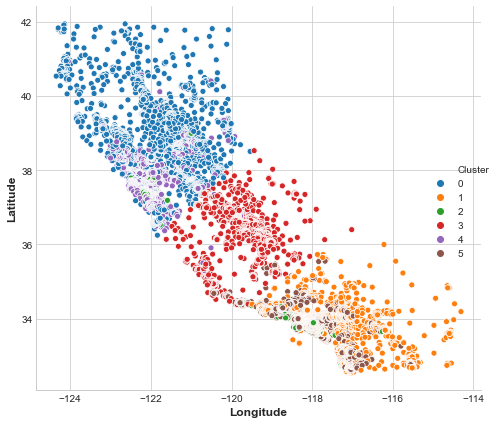

In [37]:
from sklearn.cluster import KMeans
house = pd.read_csv(r'E:/DataSet/DataSet/kaggle/get_started/FECourseData/housing.csv')
house_X = house.loc[:, ['MedInc', 'Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=6)
house_X['Cluster'] = kmeans.fit_predict(house_X)
house_X['Cluster'] = house_X['Cluster'].astype('category')
sns.relplot(x='Longitude', y='Latitude', hue='Cluster', data=house_X, height=6)

In [33]:
from sklearn.cluster import KMeans
KMeans?